In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
data = pd.read_csv("/gdrive/My Drive/2025_2026_Derin_Ogrenme/Student_Performance.csv", sep=",")
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


# **EDA (Exploratory Data Analysis - Keşfedici Veri Analizi)**

In [4]:
data.head()


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
data.isna().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [7]:
data.shape


(10000, 6)

In [9]:
data.describe()


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [10]:
# see quick info of category values

data.describe(include = object)

,Extracurricular Activities
count,10000
unique,2
top,No
freq,5052


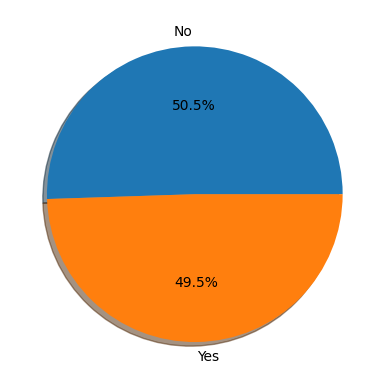

In [14]:

plt.pie(data["Extracurricular Activities"].value_counts(), labels = data["Extracurricular Activities"].value_counts().index,
        shadow = True, autopct = "%1.1f%%")
plt.show()

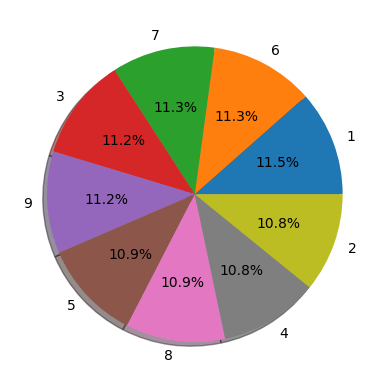

In [15]:

plt.pie(data["Hours Studied"].value_counts(), labels = data["Hours Studied"].value_counts().index,
        shadow = True, autopct = "%1.1f%%")
plt.show()

# **DATA PREPROCESSING (Veri Ön İşleme)**

In [16]:
# Extracurricular Activities sütununu 0 ve 1 olarak değiştir.

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data["Extracurricular Activities"] =  encoder.fit_transform(data["Extracurricular Activities"])

In [17]:
data.sample(2)


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
6011,7,45,1,7,2,34.0
5871,5,42,1,5,1,27.0


In [18]:
#eğitim ve test veri bölme
Train = data.drop(columns = "Performance Index")
Target = data["Performance Index"]

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Train, Target, test_size = 0.2, random_state = 42)

In [20]:
# see shape of splited data

print("x_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (8000, 5)
y_train shape:  (8000,)
x_test shape:  (2000, 5)
y_test shape:  (2000,)


# **MODELLING**

In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [22]:
model.score(X_train, y_train)


0.9886898790682355

In [23]:
predict = np.round(model.predict(X_test), decimals = 1)

In [24]:
pd.DataFrame({"Actual Performance" : y_test, "Predicted Performance" : predict})

,Actual Performance,Predicted Performance
6252,51.0,54.7
4684,20.0,22.6
1731,46.0,47.9
4742,28.0,31.3
4521,41.0,43.0
...,...,...
6412,45.0,46.9
8285,66.0,62.7
7853,16.0,16.8
1095,65.0,63.3


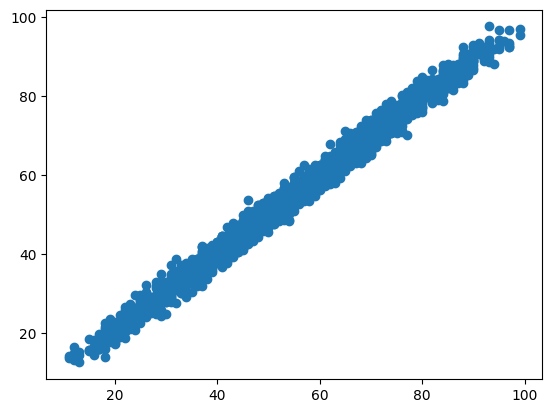

In [25]:
plt.scatter(y_test, predict)
plt.show()

# *Model Performans Değerlendirmeleri*

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, mean_absolute_percentage_error

print("Mean Absolute Error: ", mean_absolute_error(y_test, predict))
print("Mean Squared Error: ", mean_squared_error(y_test, predict))
print("Root Mean Squared Error: ", root_mean_squared_error(y_test, predict))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(y_test, predict)*100)

Mean Absolute Error:  1.612
Mean Squared Error:  4.08737
Root Mean Squared Error:  2.021724511401096
Mean Absolute Percentage Error:  3.501189296484022


In [27]:
model.coef_


array([2.85248393, 1.0169882 , 0.60861668, 0.47694148, 0.19183144])

In [28]:
model.intercept_


np.float64(-33.92194621555638)

In [ ]:
# 2.85 × Hours Studied + 1.02 × Previous Scores + 0.61 × Extracurricular Activities + 0.48 × Sleep Hours + 0.19 × Sample Question Papers Practiced - 33.92